# Diffusion constant and drift in Brownian motion

In this notebook, we will look at one more possibility how to cumpute diffusion constant and run a simulation with constant drift. 

In [36]:
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt 
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from `mpl_toolkits.mplot3d`
plt.style.use('ggplot') # use "ggplot" style for graphs
% matplotlib inline

In [46]:
dim = 3 # dimensionality of the problem
nump = 1000 # number of independent particles
nums = 1024 # number of simulation steps
dt = 0.05 # time increment
F_0 = 0.0 # Optional constant drift term, breaks symmetry
zeta = 1.0
m = 1.0
kBT = 1.0 # set constants to 1.0
std = np.sqrt(2*kBT*zeta*dt) # ~ mmagnitude of random force fluctuation
np.random.seed(0)
R = np.zeros([nump, dim]) # current position
V = np.zeros([nump, dim]) # current velocity
W = np.zeros([nump, dim]) # ~ current ranmdom force
Rs = np.zeros([nums, nump, dim]) # all positions
Vs = np.zeros([nums, nump, dim]) # all velocities
Ws = np.zeros([nums, nump, dim]) # all random forces
time = np.zeros([nums]) # all times
F_drift = np.zeros([nump, dim])
F_drift[:, 0] = F_0 # apply force along x direction

In [47]:
for i in range(nums):
    W = std*np.random.randn(nump, dim) # generate zero mean normally distributed random forces with prescribed variance
    
    #Euler Scheme
    V = V*(1-zeta/m*dt) + W/m + F_drift/m*dt
    R = R + V*dt
        
    Rs[i, :, :] = R
    Vs[i, :, :] = V
    Ws[i, :, :] = W # store current values
    time[i] = dt * i

#### Mean square displacement

Recall that mean square displacement is related to diffusion constant as:

$$\Big\langle \big[ \mathbf{R}(t) - \mathbf{R}(0) \big]^2 \Big\rangle = 6Dt.$$

Integrating both sides with respect to time yields:
$$D = \frac{1}{3 T^2} \int_0^T dt \langle[\mathbf{R}(t) - \mathbf{R}(0)]^2\rangle .$$
This can be again verified in code:

D = 1.0  (Theoretical)
D = 0.926874089843  (Simulation via MSD)


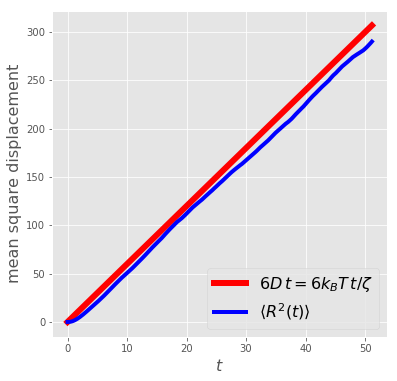

In [48]:
msd = np.zeros([nums]) # mean square displacement
for i in range(nums):
    for p in range(nump):
        msd[i] = msd[i] + np.linalg.norm(Rs[i,p,:])**2 # R(0) = 0
    msd[i] = msd[i] / nump # average over particles
    
D_msd = np.trapz(msd, dx = dt) / (3*(nums*dt)**2)

print('D =',kBT/zeta,' (Theoretical)')
print('D =',D_msd,' (Simulation via MSD)')
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_xlabel(r"$t$", fontsize=16)
ax.set_ylabel(r"mean square displacement", fontsize=16)
ax.plot(time,6*kBT/zeta*time,'r',lw=6, label=r'$6D\,t={6k_BT \,t}/{\zeta}$')
ax.plot(time,msd,'b',lw=4, label=r'$\langle R^2(t)\rangle$')
ax.legend(fontsize=16,loc=4)
plt.show()   

## Calculating drift velocity under external force

Previously, we have derived that:

$$D = \frac{{\langle V_x \rangle}_{ext} k_B T}{F_0}.$$
We can use this expressio to evaluate diffusion constant for if we known the input force:

In [49]:
F_0 = 1.0
F_drift = np.zeros([nump, dim])
F_drift[:, 0] = F_0 # apply force along x direction

for i in range(nums):
    W = std*np.random.randn(nump, dim) # generate zero mean normally distributed random forces with prescribed variance
    
    #Euler Scheme
    V = V*(1-zeta/m*dt) + W/m + F_drift/m*dt
    R = R + V*dt
        
    Rs[i, :, :] = R
    Vs[i, :, :] = V
    Ws[i, :, :] = W # store current values
    time[i] = dt * i

D = 1.0  (Theoretical)
D = 0.974075567203  (Simulation with external force)


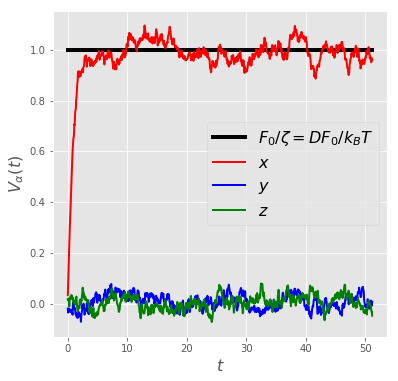

In [50]:
Vsa = np.average(Vs, axis = 1) # average over particles
Vx = np.average(Vsa[:,0]) # average over time, just x-direction -> scalar

print('D =',kBT/zeta, ' (Theoretical)')
print('D =',Vx*kBT/F_0,' (Simulation with external force)')
fig, ax = plt.subplots(figsize=(6,6))
ax.set_ylabel(r"$V_{\alpha}(t)$", fontsize=16)
ax.set_xlabel(r"$t$", fontsize=16)
ax.plot(time,F_0/zeta*np.ones(nums),'k',lw=4,label=r"$F_0/\zeta=DF_0/k_B T$")
ax.plot(time,Vsa[:,0],'r',lw=2,label="$x$")
ax.plot(time,Vsa[:,1],'b',lw=2,label="$y$")
ax.plot(time,Vsa[:,2],'g',lw=2,label="$z$")
ax.legend(fontsize=16,loc=5)
plt.show()